## 1. Import the required libraries

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2. Read the dataset

In [2]:
df = pd.read_csv("devices.csv")
df

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
0,Wifi Device Counter,nCounter,-38.168643,144.350936,unknown,unknown,LoraWAN (TTN),90673
1,Wifi Device Counter,nCounter,-38.169146,144.351186,unknown,Active,LoraWAN (TTN),76450
2,Wifi Device Counter,nCounter,-38.168741,144.351024,unknown,unknown,LoraWAN (TTN),96542
3,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149633,144.360899,unknown,unknown,LoraWAN (TTN),47938
4,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149358,144.359598,unknown,unknown,LoraWAN (TTN),24520
...,...,...,...,...,...,...,...,...
2319,Wifi Device Counter,nCounter,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),31267
2320,Wifi Device Counter,nCounter,-38.145664,144.358779,unknown,Assigned,LoraWAN (TTN),71384
2321,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,58863
2322,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,8105


## 3. Understand the dataset

In [34]:
df.groupby('devicetype').count()

,device_use,latitude,longitude,location_parameters,device_status,network,Cost
devicetype,,,,,,,
Atmos,144,144,144,144,144,144,144
Cisco Meraki,132,132,132,132,132,132,132
Elsys.SE ESM5K,95,95,95,95,95,95,95
Turbo,948,948,948,948,948,948,948
nCounter,1005,1005,1005,1005,1005,1005,1005


In [35]:
df.groupby('device_use').count()

,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
device_use,,,,,,,
Indoor Temp Sensor,95,95,95,95,95,95,95
Parking,948,948,948,948,948,948,948
Weather Station,144,144,144,144,144,144,144
Wifi Device Counter,1137,1137,1137,1137,1137,1137,1137


In [36]:
df.groupby('location_parameters').count()

,device_use,devicetype,latitude,longitude,device_status,network,Cost
location_parameters,,,,,,,
2P Diagonal,108,108,108,108,108,108,108
2P Median,48,48,48,48,48,48,48
2P Parrallel,468,468,468,468,468,468,468
3P Diagonal,36,36,36,36,36,36,36
unknown,1664,1664,1664,1664,1664,1664,1664


In [3]:
#Grouping by device_use
device_uses = df.groupby('device_use')
for device_use,rows in device_uses:
    display(device_use,rows)

'Indoor Temp Sensor'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
3,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149633,144.360899,unknown,unknown,LoraWAN (TTN),47938
4,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149358,144.359598,unknown,unknown,LoraWAN (TTN),24520
51,Indoor Temp Sensor,Elsys.SE ESM5K,-38.144711,144.360452,unknown,unknown,LoraWAN (TTN),6856
52,Indoor Temp Sensor,Elsys.SE ESM5K,-38.146812,144.358807,unknown,unknown,LoraWAN (TTN),18649
79,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149633,144.360899,unknown,unknown,LoraWAN (TTN),87845
...,...,...,...,...,...,...,...,...
2182,Indoor Temp Sensor,Elsys.SE ESM5K,-38.146812,144.358807,unknown,unknown,LoraWAN (TTN),81211
2240,Indoor Temp Sensor,Elsys.SE ESM5K,-38.144711,144.360452,unknown,unknown,LoraWAN (TTN),70118
2241,Indoor Temp Sensor,Elsys.SE ESM5K,-38.146812,144.358807,unknown,unknown,LoraWAN (TTN),55620
2299,Indoor Temp Sensor,Elsys.SE ESM5K,-38.144711,144.360452,unknown,unknown,LoraWAN (TTN),7446


'Parking'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
13,Parking,Turbo,-38.148258,144.363887,2P Parrallel,Active,LoraWAN (TTN),85080
14,Parking,Turbo,-38.152682,144.363429,2P Median,Active,LoraWAN (TTN),66529
15,Parking,Turbo,-38.148575,144.360222,2P Parrallel,Active,LoraWAN (TTN),65566
16,Parking,Turbo,-38.147503,144.357330,2P Parrallel,Active,LoraWAN (TTN),72528
26,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,97653
...,...,...,...,...,...,...,...,...
2314,Parking,Turbo,-38.143240,144.361104,3P Diagonal,Active,LoraWAN (TTN),6925
2315,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),39334
2321,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,58863
2322,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,8105


'Weather Station'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
23,Weather Station,Atmos,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),80039
24,Weather Station,Atmos,-38.145664,144.358779,unknown,Active,LoraWAN (TTN),66691
25,Weather Station,Atmos,-38.127440,144.354958,unknown,Inactive,Not LoraWAN,59946
44,Weather Station,Atmos,-38.186146,144.393875,unknown,Active,Not LoraWAN,39046
99,Weather Station,Atmos,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),40095
...,...,...,...,...,...,...,...,...
2233,Weather Station,Atmos,-38.186146,144.393875,unknown,Active,Not LoraWAN,22549
2271,Weather Station,Atmos,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),17324
2272,Weather Station,Atmos,-38.145664,144.358779,unknown,Active,LoraWAN (TTN),98802
2273,Weather Station,Atmos,-38.127440,144.354958,unknown,Inactive,Not LoraWAN,49004


'Wifi Device Counter'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
0,Wifi Device Counter,nCounter,-38.168643,144.350936,unknown,unknown,LoraWAN (TTN),90673
1,Wifi Device Counter,nCounter,-38.169146,144.351186,unknown,Active,LoraWAN (TTN),76450
2,Wifi Device Counter,nCounter,-38.168741,144.351024,unknown,unknown,LoraWAN (TTN),96542
5,Wifi Device Counter,Cisco Meraki,-38.147158,144.358161,unknown,unknown,Not LoraWAN,87320
6,Wifi Device Counter,Cisco Meraki,-38.143364,144.361926,unknown,unknown,Not LoraWAN,18239
...,...,...,...,...,...,...,...,...
2316,Wifi Device Counter,nCounter,-38.146705,144.368400,unknown,Active,LoraWAN (TTN),63405
2317,Wifi Device Counter,nCounter,-38.147519,144.373741,unknown,Inactive,LoraWAN (TTN),16959
2318,Wifi Device Counter,nCounter,-38.186146,144.393875,unknown,Active,LoraWAN (TTN),68358
2319,Wifi Device Counter,nCounter,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),31267


In [4]:
#Grouping by devicetypes
devicetypes = df.groupby('devicetype')
for devicetype,rows in devicetypes:
    display(devicetype,rows)

'Atmos'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
23,Weather Station,Atmos,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),80039
24,Weather Station,Atmos,-38.145664,144.358779,unknown,Active,LoraWAN (TTN),66691
25,Weather Station,Atmos,-38.127440,144.354958,unknown,Inactive,Not LoraWAN,59946
44,Weather Station,Atmos,-38.186146,144.393875,unknown,Active,Not LoraWAN,39046
99,Weather Station,Atmos,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),40095
...,...,...,...,...,...,...,...,...
2233,Weather Station,Atmos,-38.186146,144.393875,unknown,Active,Not LoraWAN,22549
2271,Weather Station,Atmos,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),17324
2272,Weather Station,Atmos,-38.145664,144.358779,unknown,Active,LoraWAN (TTN),98802
2273,Weather Station,Atmos,-38.127440,144.354958,unknown,Inactive,Not LoraWAN,49004


'Cisco Meraki'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
5,Wifi Device Counter,Cisco Meraki,-38.147158,144.358161,unknown,unknown,Not LoraWAN,87320
6,Wifi Device Counter,Cisco Meraki,-38.143364,144.361926,unknown,unknown,Not LoraWAN,18239
7,Wifi Device Counter,Cisco Meraki,-38.147308,144.373781,unknown,unknown,Not LoraWAN,93636
11,Wifi Device Counter,Cisco Meraki,-38.147929,144.358854,unknown,unknown,Not LoraWAN,93004
12,Wifi Device Counter,Cisco Meraki,-38.147680,144.361951,unknown,unknown,Not LoraWAN,96914
...,...,...,...,...,...,...,...,...
2188,Wifi Device Counter,Cisco Meraki,-38.148573,144.361279,unknown,unknown,Not LoraWAN,62530
2217,Wifi Device Counter,Cisco Meraki,-38.143849,144.362906,unknown,unknown,Not LoraWAN,50004
2247,Wifi Device Counter,Cisco Meraki,-38.148573,144.361279,unknown,unknown,Not LoraWAN,7391
2276,Wifi Device Counter,Cisco Meraki,-38.143849,144.362906,unknown,unknown,Not LoraWAN,45372


'Elsys.SE ESM5K'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
3,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149633,144.360899,unknown,unknown,LoraWAN (TTN),47938
4,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149358,144.359598,unknown,unknown,LoraWAN (TTN),24520
51,Indoor Temp Sensor,Elsys.SE ESM5K,-38.144711,144.360452,unknown,unknown,LoraWAN (TTN),6856
52,Indoor Temp Sensor,Elsys.SE ESM5K,-38.146812,144.358807,unknown,unknown,LoraWAN (TTN),18649
79,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149633,144.360899,unknown,unknown,LoraWAN (TTN),87845
...,...,...,...,...,...,...,...,...
2182,Indoor Temp Sensor,Elsys.SE ESM5K,-38.146812,144.358807,unknown,unknown,LoraWAN (TTN),81211
2240,Indoor Temp Sensor,Elsys.SE ESM5K,-38.144711,144.360452,unknown,unknown,LoraWAN (TTN),70118
2241,Indoor Temp Sensor,Elsys.SE ESM5K,-38.146812,144.358807,unknown,unknown,LoraWAN (TTN),55620
2299,Indoor Temp Sensor,Elsys.SE ESM5K,-38.144711,144.360452,unknown,unknown,LoraWAN (TTN),7446


'Turbo'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
13,Parking,Turbo,-38.148258,144.363887,2P Parrallel,Active,LoraWAN (TTN),85080
14,Parking,Turbo,-38.152682,144.363429,2P Median,Active,LoraWAN (TTN),66529
15,Parking,Turbo,-38.148575,144.360222,2P Parrallel,Active,LoraWAN (TTN),65566
16,Parking,Turbo,-38.147503,144.357330,2P Parrallel,Active,LoraWAN (TTN),72528
26,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,97653
...,...,...,...,...,...,...,...,...
2314,Parking,Turbo,-38.143240,144.361104,3P Diagonal,Active,LoraWAN (TTN),6925
2315,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),39334
2321,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,58863
2322,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,8105


'nCounter'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
0,Wifi Device Counter,nCounter,-38.168643,144.350936,unknown,unknown,LoraWAN (TTN),90673
1,Wifi Device Counter,nCounter,-38.169146,144.351186,unknown,Active,LoraWAN (TTN),76450
2,Wifi Device Counter,nCounter,-38.168741,144.351024,unknown,unknown,LoraWAN (TTN),96542
8,Wifi Device Counter,nCounter,-38.147906,144.363372,unknown,unknown,LoraWAN (TTN),88371
9,Wifi Device Counter,nCounter,-38.146940,144.359936,unknown,unknown,LoraWAN (TTN),12397
...,...,...,...,...,...,...,...,...
2316,Wifi Device Counter,nCounter,-38.146705,144.368400,unknown,Active,LoraWAN (TTN),63405
2317,Wifi Device Counter,nCounter,-38.147519,144.373741,unknown,Inactive,LoraWAN (TTN),16959
2318,Wifi Device Counter,nCounter,-38.186146,144.393875,unknown,Active,LoraWAN (TTN),68358
2319,Wifi Device Counter,nCounter,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),31267


In [5]:
#Grouping by device_status
device_statuses = df.groupby('device_status')
for device_status,rows in device_statuses:
    display(device_status,rows)

'Active'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
1,Wifi Device Counter,nCounter,-38.169146,144.351186,unknown,Active,LoraWAN (TTN),76450
13,Parking,Turbo,-38.148258,144.363887,2P Parrallel,Active,LoraWAN (TTN),85080
14,Parking,Turbo,-38.152682,144.363429,2P Median,Active,LoraWAN (TTN),66529
15,Parking,Turbo,-38.148575,144.360222,2P Parrallel,Active,LoraWAN (TTN),65566
16,Parking,Turbo,-38.147503,144.357330,2P Parrallel,Active,LoraWAN (TTN),72528
...,...,...,...,...,...,...,...,...
2318,Wifi Device Counter,nCounter,-38.186146,144.393875,unknown,Active,LoraWAN (TTN),68358
2319,Wifi Device Counter,nCounter,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),31267
2321,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,58863
2322,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,8105


'Assigned'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
50,Wifi Device Counter,nCounter,-38.144659,144.359293,unknown,Assigned,LoraWAN (TTN),9886
72,Wifi Device Counter,nCounter,-38.145664,144.358779,unknown,Assigned,LoraWAN (TTN),68951
126,Wifi Device Counter,nCounter,-38.144659,144.359293,unknown,Assigned,LoraWAN (TTN),28114
148,Wifi Device Counter,nCounter,-38.145664,144.358779,unknown,Assigned,LoraWAN (TTN),73481
185,Wifi Device Counter,nCounter,-38.144659,144.359293,unknown,Assigned,LoraWAN (TTN),5027
...,...,...,...,...,...,...,...,...
2202,Wifi Device Counter,nCounter,-38.145664,144.358779,unknown,Assigned,LoraWAN (TTN),9058
2239,Wifi Device Counter,nCounter,-38.144659,144.359293,unknown,Assigned,LoraWAN (TTN),26738
2261,Wifi Device Counter,nCounter,-38.145664,144.358779,unknown,Assigned,LoraWAN (TTN),88748
2298,Wifi Device Counter,nCounter,-38.144659,144.359293,unknown,Assigned,LoraWAN (TTN),89495


'Inactive'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
17,Wifi Device Counter,nCounter,-38.142426,144.360149,unknown,Inactive,LoraWAN (TTN),2683
18,Wifi Device Counter,nCounter,-38.143992,144.363769,unknown,Inactive,LoraWAN (TTN),34743
19,Wifi Device Counter,nCounter,-38.145482,144.365798,unknown,Inactive,LoraWAN (TTN),43818
25,Weather Station,Atmos,-38.127440,144.354958,unknown,Inactive,Not LoraWAN,59946
42,Wifi Device Counter,nCounter,-38.146329,144.367355,unknown,Inactive,LoraWAN (TTN),33058
...,...,...,...,...,...,...,...,...
2266,Wifi Device Counter,nCounter,-38.143992,144.363769,unknown,Inactive,LoraWAN (TTN),3766
2267,Wifi Device Counter,nCounter,-38.145482,144.365798,unknown,Inactive,LoraWAN (TTN),52046
2273,Weather Station,Atmos,-38.127440,144.354958,unknown,Inactive,Not LoraWAN,49004
2290,Wifi Device Counter,nCounter,-38.146329,144.367355,unknown,Inactive,LoraWAN (TTN),65966


'To be installed'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
67,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),10820
143,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),39355
202,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),84577
261,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),47747
320,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),94891
379,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),74637
455,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),26125
531,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),46262
590,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),6843
649,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),36730


'unknown'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
0,Wifi Device Counter,nCounter,-38.168643,144.350936,unknown,unknown,LoraWAN (TTN),90673
2,Wifi Device Counter,nCounter,-38.168741,144.351024,unknown,unknown,LoraWAN (TTN),96542
3,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149633,144.360899,unknown,unknown,LoraWAN (TTN),47938
4,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149358,144.359598,unknown,unknown,LoraWAN (TTN),24520
5,Wifi Device Counter,Cisco Meraki,-38.147158,144.358161,unknown,unknown,Not LoraWAN,87320
...,...,...,...,...,...,...,...,...
2279,Wifi Device Counter,nCounter,-38.147007,144.356540,unknown,unknown,Not LoraWAN,9128
2299,Indoor Temp Sensor,Elsys.SE ESM5K,-38.144711,144.360452,unknown,unknown,LoraWAN (TTN),7446
2300,Indoor Temp Sensor,Elsys.SE ESM5K,-38.146812,144.358807,unknown,unknown,LoraWAN (TTN),23419
2303,Wifi Device Counter,nCounter,-38.149601,144.360861,unknown,unknown,LoraWAN (TTN),9391


In [6]:
#Grouping by Network
networks = df.groupby('network')
for network,rows in networks:
    display(network,rows)

'LoraWAN (TTN)'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
0,Wifi Device Counter,nCounter,-38.168643,144.350936,unknown,unknown,LoraWAN (TTN),90673
1,Wifi Device Counter,nCounter,-38.169146,144.351186,unknown,Active,LoraWAN (TTN),76450
2,Wifi Device Counter,nCounter,-38.168741,144.351024,unknown,unknown,LoraWAN (TTN),96542
3,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149633,144.360899,unknown,unknown,LoraWAN (TTN),47938
4,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149358,144.359598,unknown,unknown,LoraWAN (TTN),24520
...,...,...,...,...,...,...,...,...
2316,Wifi Device Counter,nCounter,-38.146705,144.368400,unknown,Active,LoraWAN (TTN),63405
2317,Wifi Device Counter,nCounter,-38.147519,144.373741,unknown,Inactive,LoraWAN (TTN),16959
2318,Wifi Device Counter,nCounter,-38.186146,144.393875,unknown,Active,LoraWAN (TTN),68358
2319,Wifi Device Counter,nCounter,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),31267


'Not LoraWAN'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
5,Wifi Device Counter,Cisco Meraki,-38.147158,144.358161,unknown,unknown,Not LoraWAN,87320
6,Wifi Device Counter,Cisco Meraki,-38.143364,144.361926,unknown,unknown,Not LoraWAN,18239
7,Wifi Device Counter,Cisco Meraki,-38.147308,144.373781,unknown,unknown,Not LoraWAN,93636
11,Wifi Device Counter,Cisco Meraki,-38.147929,144.358854,unknown,unknown,Not LoraWAN,93004
12,Wifi Device Counter,Cisco Meraki,-38.147680,144.361951,unknown,unknown,Not LoraWAN,96914
...,...,...,...,...,...,...,...,...
2296,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,87077
2306,Wifi Device Counter,Cisco Meraki,-38.148573,144.361279,unknown,unknown,Not LoraWAN,9081
2321,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,58863
2322,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,8105


In [7]:
#Grouping by location_parameters
parameters = df.groupby('location_parameters')
for parameter,rows in parameters:
    display(parameter,rows)

'2P Diagonal'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
35,Parking,Turbo,-38.151505,144.364349,2P Diagonal,Active,LoraWAN (TTN),58682
59,Parking,Turbo,-38.152182,144.364247,2P Diagonal,Active,LoraWAN (TTN),3887
67,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),10820
111,Parking,Turbo,-38.151505,144.364349,2P Diagonal,Active,LoraWAN (TTN),30027
135,Parking,Turbo,-38.152182,144.364247,2P Diagonal,Active,LoraWAN (TTN),67222
...,...,...,...,...,...,...,...,...
2248,Parking,Turbo,-38.152182,144.364247,2P Diagonal,Active,LoraWAN (TTN),92652
2256,Parking,Turbo,-38.151422,144.364608,2P Diagonal,To be installed,LoraWAN (TTN),7145
2283,Parking,Turbo,-38.151505,144.364349,2P Diagonal,Active,LoraWAN (TTN),5729
2307,Parking,Turbo,-38.152182,144.364247,2P Diagonal,Active,LoraWAN (TTN),55057


'2P Median'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
14,Parking,Turbo,-38.152682,144.363429,2P Median,Active,LoraWAN (TTN),66529
65,Parking,Turbo,-38.148358,144.364635,2P Median,Active,LoraWAN (TTN),81703
90,Parking,Turbo,-38.152682,144.363429,2P Median,Active,LoraWAN (TTN),72437
141,Parking,Turbo,-38.148358,144.364635,2P Median,Active,LoraWAN (TTN),94155
200,Parking,Turbo,-38.148358,144.364635,2P Median,Active,LoraWAN (TTN),53402
259,Parking,Turbo,-38.148358,144.364635,2P Median,Active,LoraWAN (TTN),71998
318,Parking,Turbo,-38.148358,144.364635,2P Median,Active,LoraWAN (TTN),58092
377,Parking,Turbo,-38.148358,144.364635,2P Median,Active,LoraWAN (TTN),70002
402,Parking,Turbo,-38.152682,144.363429,2P Median,Active,LoraWAN (TTN),20488
453,Parking,Turbo,-38.148358,144.364635,2P Median,Active,LoraWAN (TTN),47674


'2P Parrallel'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
13,Parking,Turbo,-38.148258,144.363887,2P Parrallel,Active,LoraWAN (TTN),85080
15,Parking,Turbo,-38.148575,144.360222,2P Parrallel,Active,LoraWAN (TTN),65566
16,Parking,Turbo,-38.147503,144.357330,2P Parrallel,Active,LoraWAN (TTN),72528
33,Parking,Turbo,-38.148484,144.362902,2P Parrallel,Active,LoraWAN (TTN),51377
34,Parking,Turbo,-38.148467,144.363155,2P Parrallel,Active,LoraWAN (TTN),14565
...,...,...,...,...,...,...,...,...
2308,Parking,Turbo,-38.152520,144.363224,2P Parrallel,Active,LoraWAN (TTN),72660
2309,Parking,Turbo,-38.148512,144.361146,2P Parrallel,Active,LoraWAN (TTN),29194
2310,Parking,Turbo,-38.149572,144.361022,2P Parrallel,Active,LoraWAN (TTN),31973
2311,Parking,Turbo,-38.149885,144.361462,2P Parrallel,Active,LoraWAN (TTN),59740


'3P Diagonal'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
66,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),10552
142,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),92450
201,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),50120
260,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),38801
319,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),27275
378,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),70548
454,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),73338
530,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),58394
589,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),85018
648,Parking,Turbo,-38.14324,144.361104,3P Diagonal,Active,LoraWAN (TTN),38822


'unknown'

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
0,Wifi Device Counter,nCounter,-38.168643,144.350936,unknown,unknown,LoraWAN (TTN),90673
1,Wifi Device Counter,nCounter,-38.169146,144.351186,unknown,Active,LoraWAN (TTN),76450
2,Wifi Device Counter,nCounter,-38.168741,144.351024,unknown,unknown,LoraWAN (TTN),96542
3,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149633,144.360899,unknown,unknown,LoraWAN (TTN),47938
4,Indoor Temp Sensor,Elsys.SE ESM5K,-38.149358,144.359598,unknown,unknown,LoraWAN (TTN),24520
...,...,...,...,...,...,...,...,...
2319,Wifi Device Counter,nCounter,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),31267
2320,Wifi Device Counter,nCounter,-38.145664,144.358779,unknown,Assigned,LoraWAN (TTN),71384
2321,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,58863
2322,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,8105


## 4. Preprocessing

Before modelling we have to change the data to numeric format as KMeans does not work with categorical variable. We have to create dummy variables for the selected features. 

In [8]:
#Creating dummy variables
device_use_dummy = pd.get_dummies(df['device_use'])
devicetype_dummy = pd.get_dummies(df['devicetype'])
device_status_dummy = pd.get_dummies(df['device_status'])
network_dummy = pd.get_dummies(df['network'])
parameter_dummy = pd.get_dummies(df['location_parameters'])
#Concatenating the dummy variables to the original dataset 
df_dummy_set=pd.concat([df,device_use_dummy,
devicetype_dummy,device_status_dummy,network_dummy,parameter_dummy],axis=1)
#Deleting categorical variable from the dummy set
del df_dummy_set['device_use']
del df_dummy_set['devicetype']
del df_dummy_set['device_status']
del df_dummy_set['network']
del df_dummy_set['location_parameters']

In [9]:
df_dummy_set

,latitude,longitude,Cost,Indoor Temp Sensor,Parking,Weather Station,Wifi Device Counter,Atmos,Cisco Meraki,Elsys.SE ESM5K,...,Inactive,To be installed,unknown,LoraWAN (TTN),Not LoraWAN,2P Diagonal,2P Median,2P Parrallel,3P Diagonal,unknown
0,-38.168643,144.350936,90673,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,-38.169146,144.351186,76450,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-38.168741,144.351024,96542,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,-38.149633,144.360899,47938,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
4,-38.149358,144.359598,24520,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-38.122023,144.359141,31267,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2320,-38.145664,144.358779,71384,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2321,0.000000,0.000000,58863,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2322,0.000000,0.000000,8105,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## 5. Modelling

In [10]:
#Importing KMeans
from sklearn.cluster import KMeans

In [11]:
#Modeling
kmeans = KMeans(2)
kfit = kmeans.fit(df_dummy_set)
identified_clusters = kfit.predict(df_dummy_set)

In [12]:
#Appending the identified clusters to the original data
clustered_data = df.copy()
clustered_data['Cluster'] = identified_clusters
#Viewing the data with clusters
display(clustered_data.sort_values(by='Cluster'))

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost,Cluster
769,Wifi Device Counter,nCounter,-38.147519,144.373741,unknown,Inactive,LoraWAN (TTN),43137,0
1829,Wifi Device Counter,Cisco Meraki,-38.143849,144.362906,unknown,unknown,Not LoraWAN,24209,0
958,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,47838,0
1832,Wifi Device Counter,nCounter,-38.147007,144.356540,unknown,unknown,Not LoraWAN,48906,0
954,Wifi Device Counter,nCounter,-38.147928,144.358838,unknown,Active,LoraWAN (TTN),39553,0
...,...,...,...,...,...,...,...,...,...
1011,Wifi Device Counter,nCounter,-38.143080,144.361831,unknown,Active,LoraWAN (TTN),98076,1
1010,Parking,Turbo,-38.148329,144.364831,2P Parrallel,Active,LoraWAN (TTN),60379,1
1008,Parking,Turbo,-38.151274,144.358184,2P Parrallel,Active,LoraWAN (TTN),82630,1
1060,Wifi Device Counter,nCounter,-38.147007,144.356540,unknown,unknown,Not LoraWAN,53965,1


Analyze the table and determine on which feature does the cluster based on. It is based on the cost of the devices.

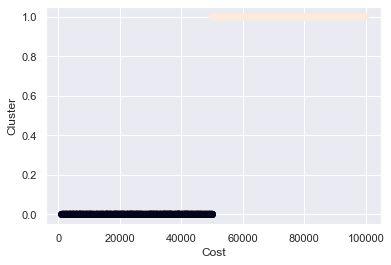

In [13]:
#Plotting the graph
plt.xlabel('Cost')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Cost'],clustered_data['Cluster'],c=clustered_data['Cluster'])

Cost is very large in terms of magnitude. Let's scale the data and then apply KMeans.

In [14]:
#Importing the library
from sklearn import preprocessing
#Passing the values of the dataset to Min-Max-Scaler
df_values = df_dummy_set.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_values)
df_scaled = pd.DataFrame(x_scaled,
columns=df_dummy_set.columns)

In [15]:
#Modeling
kmeans = KMeans(2)
kfit = kmeans.fit(df_scaled)
identified_clusters_scaled = kfit.predict(df_scaled)
#Appending the identified clusters to the dataframe
clustered_data_scaled = df.copy()
clustered_data_scaled['Cluster'] = identified_clusters_scaled
display(clustered_data_scaled.sort_values(by='Cluster'))

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost,Cluster
0,Wifi Device Counter,nCounter,-38.168643,144.350936,unknown,unknown,LoraWAN (TTN),90673,0
1054,Weather Station,Atmos,-38.127440,144.354958,unknown,Inactive,Not LoraWAN,49993,0
1053,Weather Station,Atmos,-38.145664,144.358779,unknown,Active,LoraWAN (TTN),89749,0
1052,Weather Station,Atmos,-38.122023,144.359141,unknown,Active,LoraWAN (TTN),68576,0
1051,Wifi Device Counter,nCounter,-38.127440,144.354958,unknown,Active,LoraWAN (TTN),1018,0
...,...,...,...,...,...,...,...,...,...
1091,Parking,Turbo,-38.149572,144.361022,2P Parrallel,Active,LoraWAN (TTN),45800,1
1090,Parking,Turbo,-38.148512,144.361146,2P Parrallel,Active,LoraWAN (TTN),59284,1
1089,Parking,Turbo,-38.152520,144.363224,2P Parrallel,Active,LoraWAN (TTN),82427,1
1077,Parking,Turbo,0.000000,0.000000,unknown,Active,Not LoraWAN,50833,1


The cluster is now based on the devicetype

In [16]:
# K= 5
#Modeling
kmeans = KMeans(5)
kfit = kmeans.fit(df_scaled)
identified_clusters_scaled = kfit.predict(df_scaled)
#Appending the identified clusters to the dataframe
clustered_data_scaled = df.copy()
clustered_data_scaled['Cluster'] = identified_clusters_scaled
display(clustered_data_scaled.sort_values(by='Cluster'))

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost,Cluster
836,Parking,Turbo,-38.152520,144.363224,2P Parrallel,Active,LoraWAN (TTN),14907,0
1300,Parking,Turbo,-38.151021,144.357306,2P Parrallel,Active,LoraWAN (TTN),2773,0
1299,Parking,Turbo,-38.149885,144.361462,2P Parrallel,Active,LoraWAN (TTN),83608,0
1298,Parking,Turbo,-38.149572,144.361022,2P Parrallel,Active,LoraWAN (TTN),21235,0
1297,Parking,Turbo,-38.148512,144.361146,2P Parrallel,Active,LoraWAN (TTN),8448,0
...,...,...,...,...,...,...,...,...,...
955,Weather Station,Atmos,-38.186146,144.393875,unknown,Active,Not LoraWAN,67576,4
1339,Weather Station,Atmos,-38.186146,144.393875,unknown,Active,Not LoraWAN,72404,4
297,Weather Station,Atmos,-38.186146,144.393875,unknown,Active,Not LoraWAN,36860,4
336,Weather Station,Atmos,-38.145664,144.358779,unknown,Active,LoraWAN (TTN),87685,4


In [41]:
sortedx = clustered_data_scaled.sort_values(by='Cluster')
x = sortedx.groupby('Cluster').count()
x

,device_use,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
Cluster,,,,,,,,
0,660,660,660,660,660,660,660,660
1,933,933,933,933,933,933,933,933
2,288,288,288,288,288,288,288,288
3,299,299,299,299,299,299,299,299
4,144,144,144,144,144,144,144,144


In [42]:
x.groupby('device_use').count()

,devicetype,latitude,longitude,location_parameters,device_status,network,Cost
device_use,,,,,,,
144,1,1,1,1,1,1,1
288,1,1,1,1,1,1,1
299,1,1,1,1,1,1,1
660,1,1,1,1,1,1,1
933,1,1,1,1,1,1,1


In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

print('silhouette_score: ',silhouette_score(df_scaled, identified_clusters_scaled, metric='euclidean'))
print('davies_bouldin_score: ',davies_bouldin_score(df_scaled, identified_clusters_scaled) )

silhouette_score:  0.5614602528046887
davies_bouldin_score:  0.9411993953396435


## References

https://medium.com/analytics-vidhya/practical-approach-to-kmeans-clustering-python-and-why-scaling-is-important-44ac0b0fea47